<div class="alert alert-block alert-info">
<b> Keywords: FEATURE ENG - Scaling / transforming numerical variables</b></div>
   
    - MinMaxScaler() -> range of new variable [0,1]
    - RobustScaler() -> for reducing the effects of outliers
    - StandardScaler() -> mean variable is 0 and about 68% of the values  lie between -1 and 1.

# Feature engineering - Scaling

Data play a major role in data analytics and data science. It is definitely the basis of all the process in these eco space. This notebook is going to talk about feature scaling.

    what is it ?
    why do we need it ?
    and how to we use it.

<a class="anchor" id="0.1"></a>
# **Table of contents**

0. [Feature scaling - Why? What and When?](#0)
1.	[Loading the data and some EDA](#1)
2.	[Feature scaling](#2)
    - [2.1. `MinMaxScaler()`](#2.1)
    - [2.3. `StandardScaler()`](#2.2)
    
3. [Effect on Outliers](#3)
    - [3.1. `MinMaxScaler()`](#3.1)
    - [3.3. `StandardScaler()`](#3.2)

# 0. Feature scaling <a class="anchor" id="0"></a>

[^Index](#0.1)

Feature scaling can vary your results a lot while using certain algorithms and have a minimal or no effect in others.

**Why Scaling**

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.


If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weight in a lot more in the distance calculations than features with low magnitudes.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQq-YBKSre4Cyko3uheL3iypvha4nnM0sJgmw&usqp=CAU" border="0" />

## a) MinMax scaler

For each value in a feature, `MinMaxScaler` subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

`MinMaxScaler` preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

> The default range for the feature returned by `MinMaxScaler` is 0 to 1.


## b) Standard scaler

Standardizes a feature by subtracting the mean and then scaling to unit variance. StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

> `StandardScaler` makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.


**Wrap**
- Use `MinMaxScaler` as the default if you are transforming a feature. It’s non-distorting.
- You could use `RobustScaler` if you have outliers and want to reduce their influence. However, you might be better off removing the outliers, instead.
- Use `StandardScaler` if you need a relatively normal distribution.

 <img src="https://miro.medium.com/max/1096/1*j70yEjkLyEwZWGWjszRQXQ.png" border="0" />

## When should we use Scaling methods?

Numerical features preprocessing is different for tree and non tree model.

1) Usually:
- Tree based models does not depend on scaling
- Non-tree based models hugely depend on scaling

2) Most Often used preprocessing are:
- `MinMax scaler` to [0,1]
- `Standard Scaler` to mean = 0 and std =1


Some more examples of algorithms where feature scaling matters are:
- `k-nearest neighbors` with an Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.

- Scaling is critical, while performing `Principal Component Analysis(PCA)`. PCA tries to get the features with maximum variance and the variance is high for high magnitude features. This skews the PCA towards high magnitude features.

Some more algorithms in which scaling does not have much effect:
- Tree based models are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees (`Decision Trees`, `RandomForest`, `XGBOOST`...)

- Algorithms like `Linear Discriminant Analysis(LDA)`, `Naive Bayes` are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect.

Linear / Logistic Regression

➡️ PHẢI scale

# 1. Loading the data and some EDA <a class="anchor" id="1"></a>

[^Index](#0.1)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/__DSCI 363/W2_Data Preparation and Feature Engineering/W2_Data')

In [ ]:
# Loading Data
data = pd.read_csv('Filtered_dataset.csv')

In [ ]:
data.head()

,Glucose,BMI,Age,DiabetesPedigreeFunction,Outcome
0,148,33.6,50,0.627,1
1,85,26.6,31,0.351,0
2,89,28.1,21,0.167,0
3,137,43.1,33,2.288,1
4,78,31.0,26,0.248,1


In [ ]:
# Let's drop Unnamed:0
data
data = data.drop('Unnamed: 0', axis= 1)

In [ ]:
# Getting dataframe columns names
dataname = data.columns
dataname

Index(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Outcome'], dtype='object')

In [ ]:
data

,Glucose,BMI,Age,DiabetesPedigreeFunction,Outcome
0,148,33.6,50,0.627,1
1,85,26.6,31,0.351,0
2,89,28.1,21,0.167,0
3,137,43.1,33,2.288,1
4,78,31.0,26,0.248,1
...,...,...,...,...,...
517,170,44.0,43,0.403,1
518,101,32.9,63,0.171,0
519,122,36.8,27,0.340,0
520,121,26.2,30,0.245,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   522 non-null    int64  
 1   BMI                       522 non-null    float64
 2   Age                       522 non-null    int64  
 3   DiabetesPedigreeFunction  522 non-null    float64
 4   Outcome                   522 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 20.5 KB


# 2. Feature Scaling <a class="anchor" id="2"></a>

[^Index](#0.1)

## 2.1. MinMax scaler <a class="anchor" id="2.1"></a>


For each value in a feature, `MinMaxScaler` subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

`MinMaxScaler` preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

> The default range for the feature returned by `MinMaxScaler` is 0 to 1.

In [ ]:
#First let's drop our target variable!
df = data.drop('Outcome', axis=1)
dfname = df.columns

In [ ]:
df

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,148,33.6,50,0.627
1,85,26.6,31,0.351
2,89,28.1,21,0.167
3,137,43.1,33,2.288
4,78,31.0,26,0.248
...,...,...,...,...
517,170,44.0,43,0.403
518,101,32.9,63,0.171
519,122,36.8,27,0.340
520,121,26.2,30,0.245


In [ ]:
# Initialise the Scaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [ ]:
# Scale data
data_scaled = scaler.fit_transform(df)
data_scaled


array([[0.64335664, 0.56565657, 0.48333333, 0.23211991],
       [0.2027972 , 0.44781145, 0.16666667, 0.11391863],
       [0.23076923, 0.47306397, 0.        , 0.03511777],
       ...,
       [0.46153846, 0.61952862, 0.1       , 0.10920771],
       [0.45454545, 0.44107744, 0.15      , 0.06852248],
       [0.25874126, 0.51178451, 0.03333333, 0.09850107]])

In [ ]:
pd.DataFrame?

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns= dfname) #columns = df.columns


In [ ]:
data_scaled

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,0.643357,0.565657,0.483333,0.232120
1,0.202797,0.447811,0.166667,0.113919
2,0.230769,0.473064,0.000000,0.035118
3,0.566434,0.725589,0.200000,0.943469
4,0.153846,0.521886,0.083333,0.069807
...,...,...,...,...
517,0.797203,0.740741,0.366667,0.136188
518,0.314685,0.553872,0.700000,0.036831
519,0.461538,0.619529,0.100000,0.109208
520,0.454545,0.441077,0.150000,0.068522


In [ ]:
def get_Stats(data):
    statist = []
    for col in data:
        min_var = data[col].min()
        mean_var = data[col].mean()
        max_var = data[col].max()
        list_metrics = [min_var, mean_var, max_var]
        statist.append(list_metrics)

    statist = pd.DataFrame(statist,columns = ['min', 'mean', 'max'],
                           index = data.columns)
    #print(statist) --> just present the results, not save
    return statist

    # Hàm này dùng để tính thống kê cơ bản cho từng cột số trong DataFrame.


In [ ]:
get_Stats(data_scaled)

,min,mean,max
Glucose,0.0,0.451906,1.0
BMI,0.0,0.548538,1.0
Age,0.0,0.172446,1.0
DiabetesPedigreeFunction,0.0,0.180560,1.0


In [ ]:
# Let's reassign Outcome
data_scaled = pd.concat([data_scaled, data.Outcome], axis=1)
data_scaled

,Glucose,BMI,Age,DiabetesPedigreeFunction,Outcome
0,0.643357,0.565657,0.483333,0.232120,1
1,0.202797,0.447811,0.166667,0.113919,0
2,0.230769,0.473064,0.000000,0.035118,0
3,0.566434,0.725589,0.200000,0.943469,1
4,0.153846,0.521886,0.083333,0.069807,1
...,...,...,...,...,...
517,0.797203,0.740741,0.366667,0.136188,1
518,0.314685,0.553872,0.700000,0.036831,0
519,0.461538,0.619529,0.100000,0.109208,0
520,0.454545,0.441077,0.150000,0.068522,0


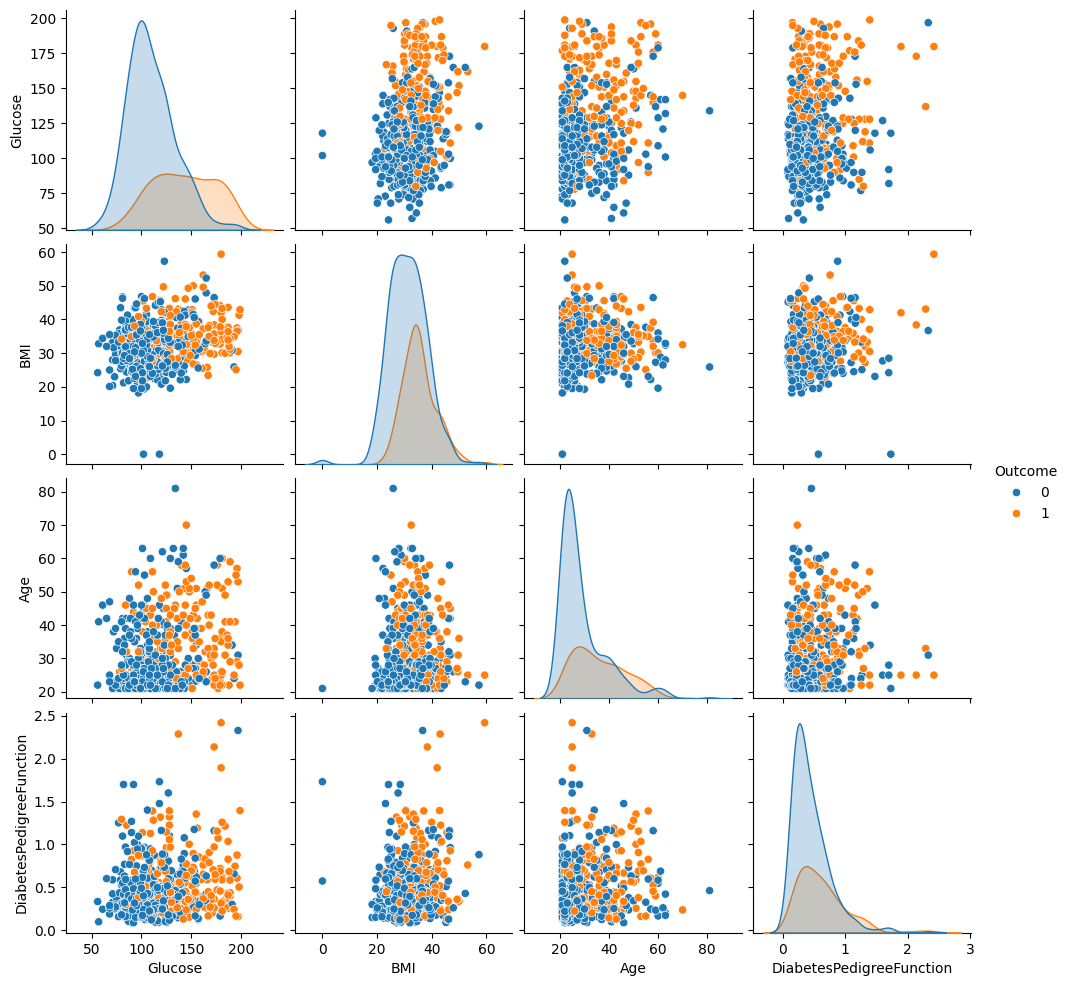

In [ ]:
## Pairplot  Raw data
sns.pairplot(data,hue='Outcome')


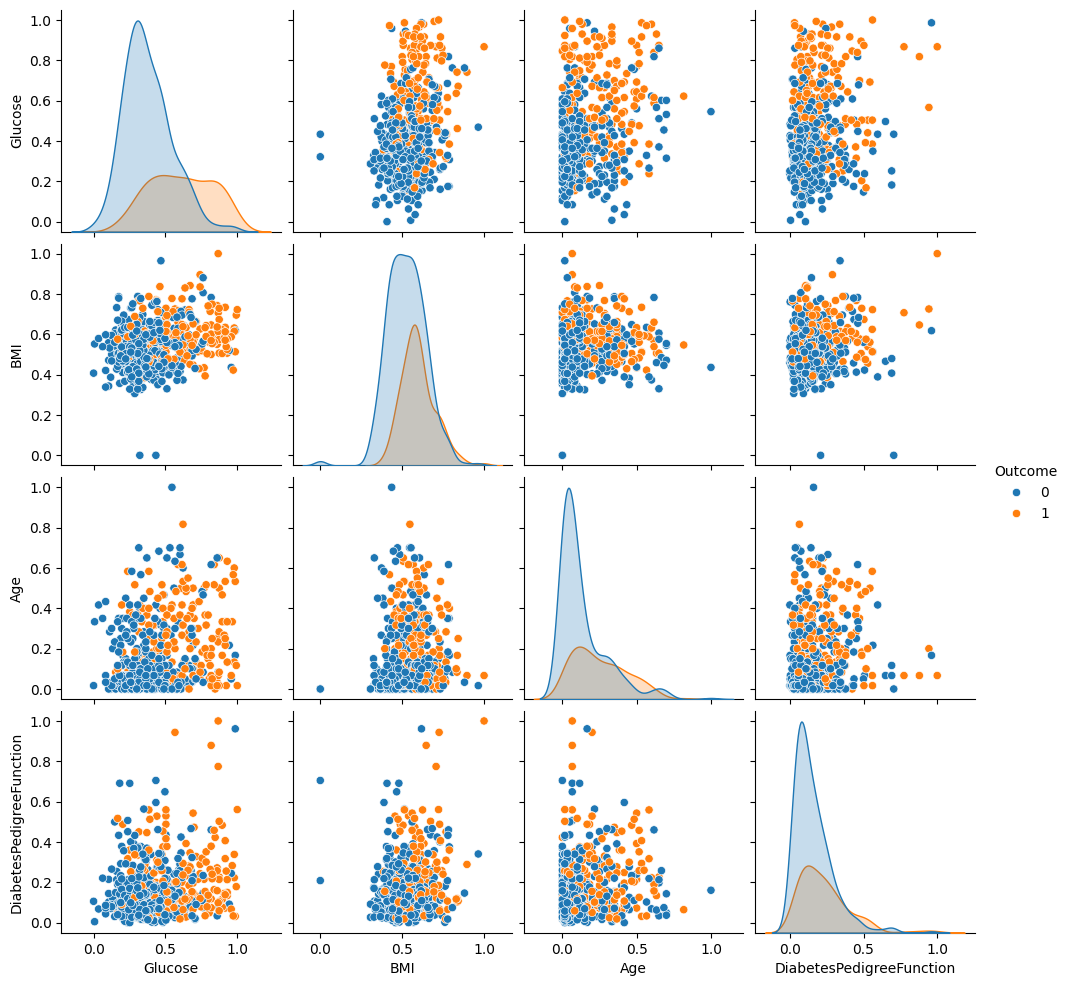

In [ ]:
## Pairplot
sns.pairplot(data_scaled,hue='Outcome')

## 2.2 Standard scaler

<a class="anchor" id="2.3"></a>

[^Index](#0.1)

Standardizes a feature by subtracting the mean and then scaling to unit variance. StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

> `StandardScaler` makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.


In [ ]:
# Initialise the Scaler
scaler = StandardScaler()

# Scale data
data_Sscaled = scaler.fit_transform(df)
data_Sscaled = pd.DataFrame(data_Sscaled, columns= dfname)

In [ ]:
data_Sscaled

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,0.894036,0.146501,1.764678,0.343924
1,-1.163292,-0.862002,-0.032803,-0.444522
2,-1.032668,-0.645894,-0.978846,-0.970152
3,0.534820,1.515182,0.156405,5.088884
4,-1.391884,-0.228086,-0.505825,-0.738760
...,...,...,...,...
517,1.612468,1.644846,1.102448,-0.295974
518,-0.640796,0.045650,2.994533,-0.958725
519,0.044980,0.607530,-0.411220,-0.475945
520,0.012324,-0.919630,-0.127408,-0.747330


In [ ]:
get_Stats(data_Sscaled)

,min,mean,max
Glucose,-2.110316,-3.402982e-17,2.559493
BMI,-4.694310,-1.327163e-16,3.863551
Age,-0.978846,1.327163e-16,4.697410
DiabetesPedigreeFunction,-1.204401,1.905670e-16,5.465967


In [ ]:
# Let's reassign Outcome
data_Sscaled = pd.concat([data_Sscaled, data.Outcome], axis=1)
data_Sscaled

,Glucose,BMI,Age,DiabetesPedigreeFunction,Outcome
0,0.894036,0.146501,1.764678,0.343924,1
1,-1.163292,-0.862002,-0.032803,-0.444522,0
2,-1.032668,-0.645894,-0.978846,-0.970152,0
3,0.534820,1.515182,0.156405,5.088884,1
4,-1.391884,-0.228086,-0.505825,-0.738760,1
...,...,...,...,...,...
517,1.612468,1.644846,1.102448,-0.295974,1
518,-0.640796,0.045650,2.994533,-0.958725,0
519,0.044980,0.607530,-0.411220,-0.475945,0
520,0.012324,-0.919630,-0.127408,-0.747330,0


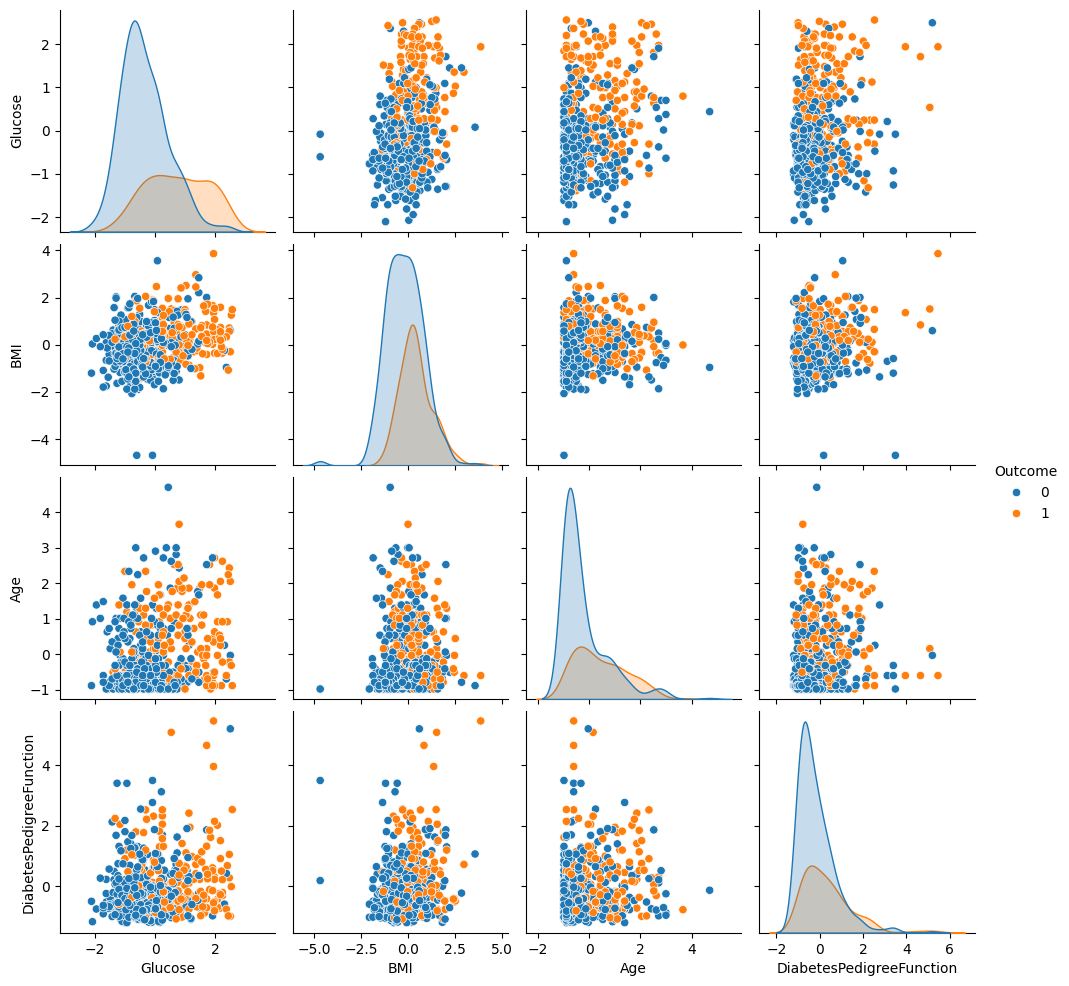

In [ ]:
## Pairplot
sns.pairplot(data_Sscaled,hue='Outcome')

# 3. Effect on possible Outliers
<a class="anchor" id="3"></a>

[^Index](#0.1)

        We are going to see the impact of performing those data transformations in terms of Outliers

## 3.1. MinMaxScaler
<a class="anchor" id="3.1"></a>

In [ ]:
#Box plot - RawData
fig = px.box(df,  color_discrete_sequence= ['LightSeaGreen'])
fig.update_layout(title= 'RAW_data')

In [ ]:
#Box plot - MinMaxScaled data
fig = px.box(data_scaled.drop(['Outcome'],axis=1), color_discrete_sequence= ['LimeGreen'])
fig.update_layout(title= 'MinMax_data')

Boxplot của dữ liệu sau khi dùng MinMaxScaler
➡️ Tất cả biến đã được đưa về khoảng [0, 1]


MinMax không xử lý outlier
Chỉ co dữ liệu về 0–1

-> Hình này cho thấy MinMaxScaler giúp các biến cùng thang đo, nhưng outliers vẫn tồn tại.